In [ ]:
student_name = 'AmirHossein Naghdi'
student_id = '400102169'

#Q1

##part 1

In [ ]:
import cvxpy as cp

# (a) ||(x, y, z)||_2^2 <= 1
x = cp.Variable()
y = cp.Variable()
z = cp.Variable()
problem_a = cp.Problem(cp.Minimize(0) , [cp.square(cp.norm(cp.vstack([x, y, z]),2)) <= 1])
problem_a.solve()
print(problem_a.is_dcp())

True


In [ ]:
# (b) sqrt(x^2 + 1) <= 3x + y
x, y = cp.Variable(), cp.Variable()
problem_b = cp.Problem(cp.Minimize(0) , [cp.norm(cp.vstack([x, 1])) <= 3*x+y])
problem_b.solve()
print(problem_b.is_dcp())

True


In [ ]:
# (c) 1/x + 2/y <= 5, x > 0, y > 0
x, y = cp.Variable(pos=True), cp.Variable(pos=True)
problem_c = cp.Problem(cp.Minimize(0) , [cp.inv_pos(x) + 2*cp.inv_pos(y) <= 5])
problem_c.solve()
print(problem_c.is_dcp())

True


In [ ]:
# (d) (x + z)y >= 1, x + z >= 0, y >= 0
x, y, z = cp.Variable(), cp.Variable(nonneg=True), cp.Variable()
problem_d = cp.Problem(cp.Minimize(0) , [cp.geo_mean(cp.hstack([y, x + z])) >= 1 , x+z >=0])
problem_d.solve()
print(problem_d.is_dcp())

True


In [ ]:
# (e) x * sqrt(y) >= 1, x >= 0, y >= 0
x, y = cp.Variable(nonneg=True), cp.Variable(nonneg=True)
problem_e = cp.Problem(cp.Minimize(0) , [cp.geo_mean(cp.hstack([cp.sqrt(y), x])) >= 1 ])
problem_e.solve()
print(problem_e.is_dcp())

True


In [ ]:
# (f) log(e^(y - 1) + e^(x/2)) <= -e^x
x, y = cp.Variable(), cp.Variable()
problem_f = cp.Problem(cp.Minimize(0) , [cp.log_sum_exp(cp.hstack([cp.exp(y-1) , cp.exp(x/2)]))  <= -(cp.exp(x))])
problem_f.solve()
print(problem_f.is_dcp())

True


In [ ]:
# (g) y^2 / (x + z) <= 1
x, y, z = cp.Variable(), cp.Variable(), cp.Variable()
problem_g = cp.Problem(cp.Minimize(0) , [cp.quad_over_lin(y , (x+z)) <= 1])
problem_g.solve()
print(problem_g.is_dcp())

True


In [ ]:
# (h) x * log(x / y) <= x - y
x, y = cp.Variable(pos=True), cp.Variable(pos=True)
problem_h = cp.Problem(cp.Minimize(0) , [cp.kl_div(x, y) <= 0])
problem_h.solve()
print(problem_h.is_dcp())

True


##part 2

In [ ]:
import numpy as np
import cvxpy as cp

n = 5
alpha = 1.0
beta = np.array([0.5] * n)
lambda_param = 0.1


x = cp.Variable(n, nonneg=True)  # x is in R^n_{++}

objective = cp.Minimize(cp.log(alpha + beta @ x) + lambda_param * cp.norm(x, 2))

constraints = [cp.sum(x) <= 1]

problem = cp.Problem(objective, constraints)


# Q2


## part1

In [ ]:
import csv
import numpy as np
import cvxpy as cp
from PIL import Image
import matplotlib.pyplot as plt

def read_image(filename):
    with open(filename, newline='') as f:
        reader = csv.reader(f)
        image = np.array([[float(pixel) for pixel in row] for row in reader])
    return image

def lasso(Y, lam=1.0, p=1):
    n, m = Y.shape
    Θ = cp.Variable((n, m))

    obj = 0.5 * cp.sum_squares(cp.vec(Y - Θ))
    for i in range(n):
        for j in range(m):
            vec0 = cp.abs(Θ[i, j] - Θ[i, j+1]) if j < m - 1 else 0
            vec1 = cp.abs(Θ[i, j] - Θ[i+1, j]) if i < n - 1 else 0
            obj += lam * cp.norm(cp.vstack([vec0, vec1]), p)

    prob = cp.Problem(cp.Minimize(obj))
    prob.solve(solver=cp.SCS, verbose=False)
    return prob.value, Θ.value

def display_grayscale_image(img_array):
    img = Image.fromarray((img_array * 255).astype(np.uint8))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()


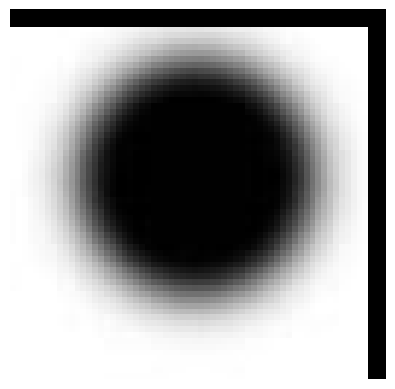

In [ ]:
toy = read_image("toy.csv")
display_grayscale_image(toy)

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


Optimal value for p=1: 199.77117641436223


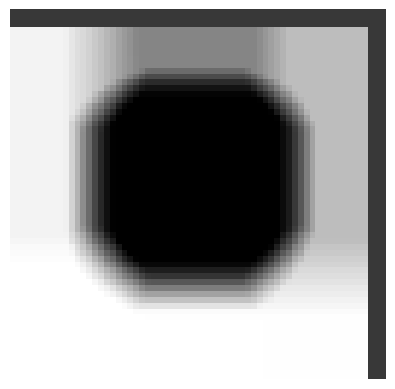

In [ ]:
# LASSO with p=1
opt1, img1 = lasso(toy, 1, 1)
print("Optimal value for p=1:", opt1)
display_grayscale_image(img1)

Optimal value for p=2: 182.20674924329853


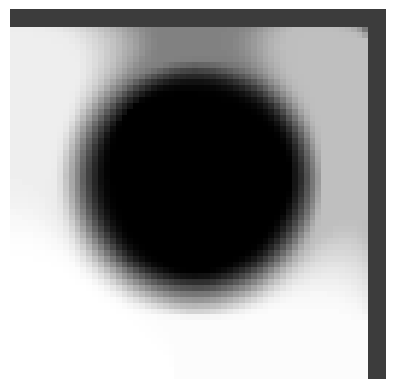

In [ ]:
# LASSO with p=2
opt2, img2 = lasso(toy, 1, 2)
print("Optimal value for p=2:", opt2)
display_grayscale_image(img2)

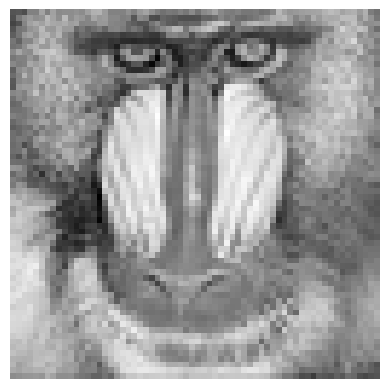

For λ=10^(-0/4), p=1, the optimal value is 36.60875428292438


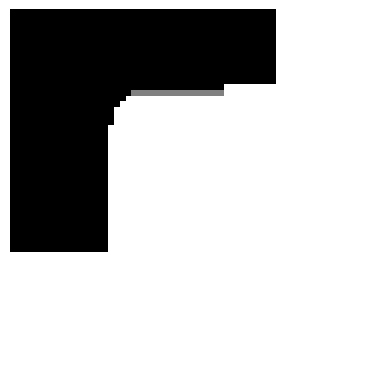

For λ=10^(-1/4), p=1, the optimal value is 34.71716598052958


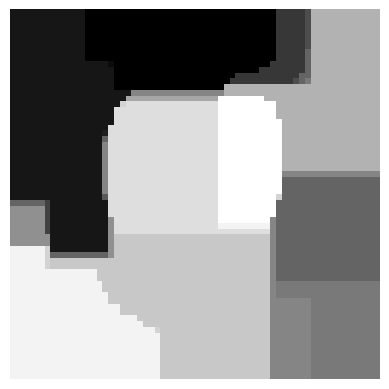

For λ=10^(-2/4), p=1, the optimal value is 29.2173553113011


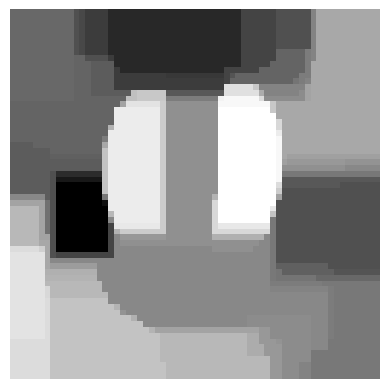

For λ=10^(-3/4), p=1, the optimal value is 22.60191235714201


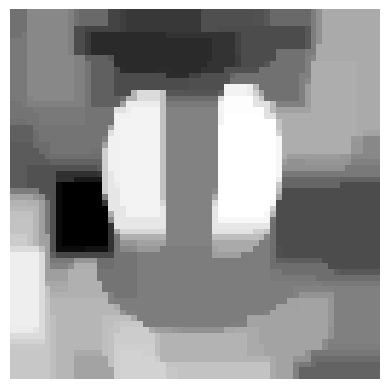

For λ=10^(-4/4), p=1, the optimal value is 16.65154865530686


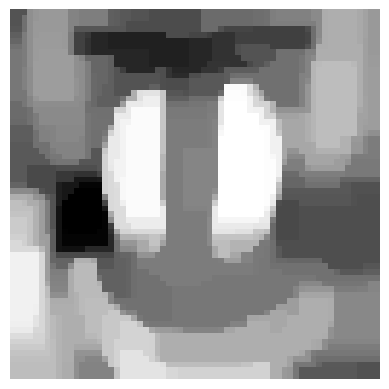

For λ=10^(-5/4), p=1, the optimal value is 11.913506552154717


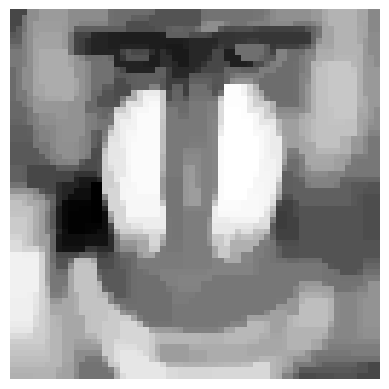

For λ=10^(-6/4), p=1, the optimal value is 8.197551805752076


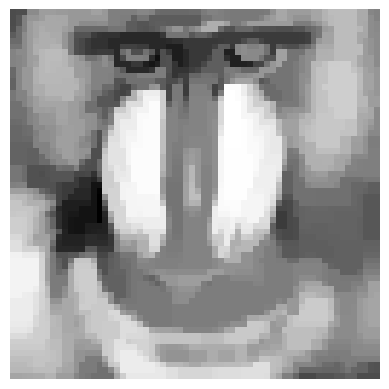

For λ=10^(-7/4), p=1, the optimal value is 5.424438718290879


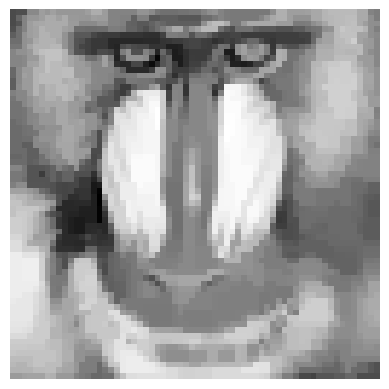

For λ=10^(-8/4), p=1, the optimal value is 3.446809139288647


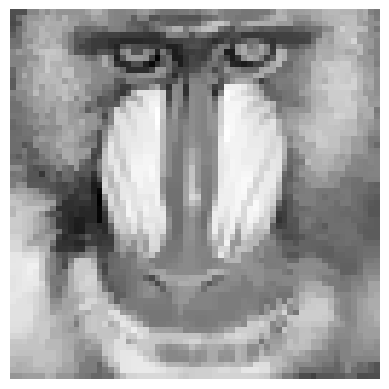

For λ=10^(-0/4), p=2, the optimal value is 36.42346881049032


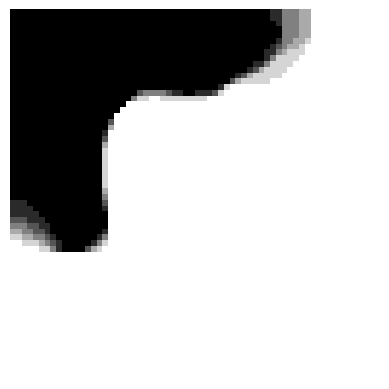

For λ=10^(-1/4), p=2, the optimal value is 33.77613196643493


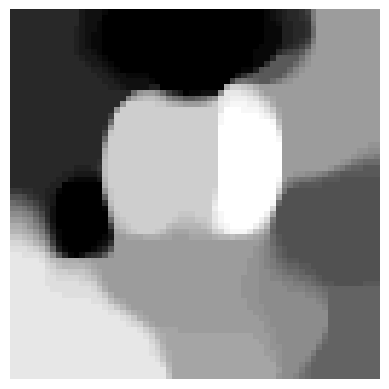

For λ=10^(-2/4), p=2, the optimal value is 27.725419284388952


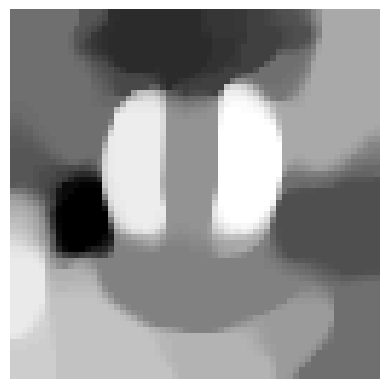

For λ=10^(-3/4), p=2, the optimal value is 21.085668500994313


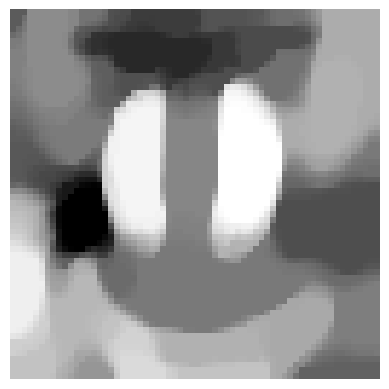

For λ=10^(-4/4), p=2, the optimal value is 15.345607547633861


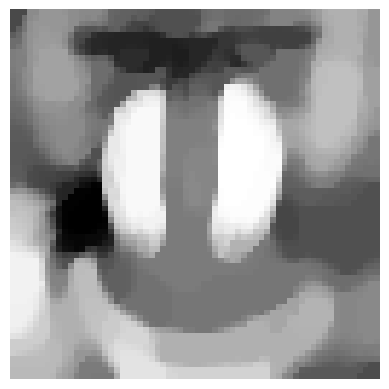

For λ=10^(-5/4), p=2, the optimal value is 10.786630812757682


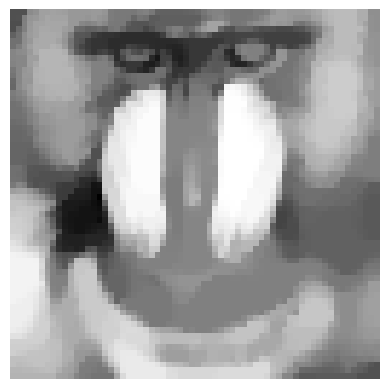

For λ=10^(-6/4), p=2, the optimal value is 7.2621742732973


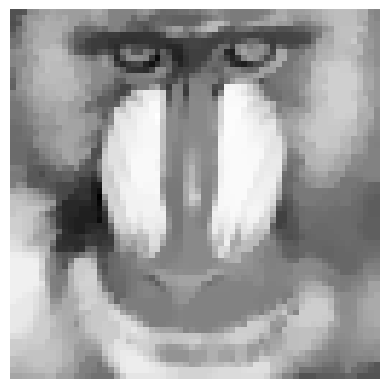

For λ=10^(-7/4), p=2, the optimal value is 4.693075024124598


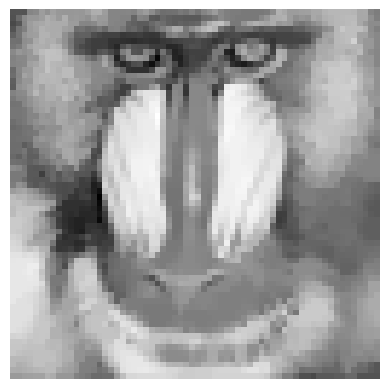

For λ=10^(-8/4), p=2, the optimal value is 2.9123674575665612


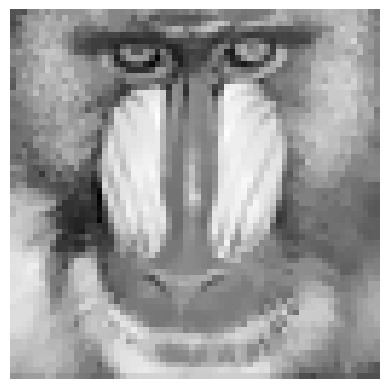

In [ ]:
# Running LASSO on the "baboon" image with multiple lambda and p values
baboon = read_image("baboon.csv")
display_grayscale_image(baboon)

results = []
for p in [1, 2]:
    for lam_exp in range(9):
        lam = 10 ** (-lam_exp / 4)
        opt, img = lasso(baboon, lam, p)
        results.append((opt, img))
        print(f"For λ=10^(-{lam_exp}/4), p={p}, the optimal value is {opt}")
        display_grayscale_image(img)

I do this part to have better results

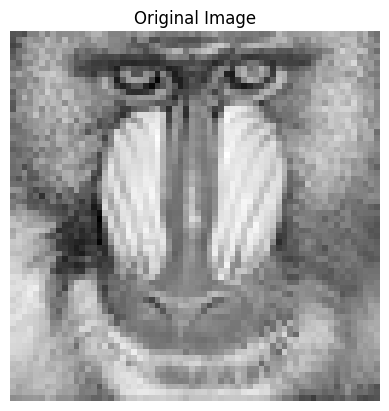

Lambda = 0.5623413251903491
Isotropic Objective Value: 33.69976680751338


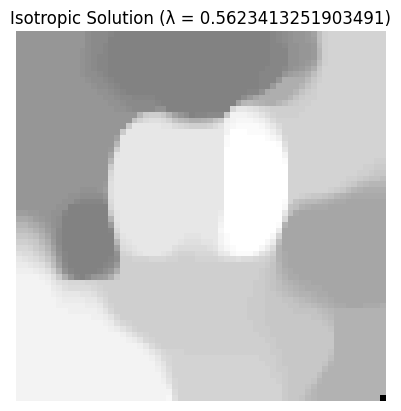

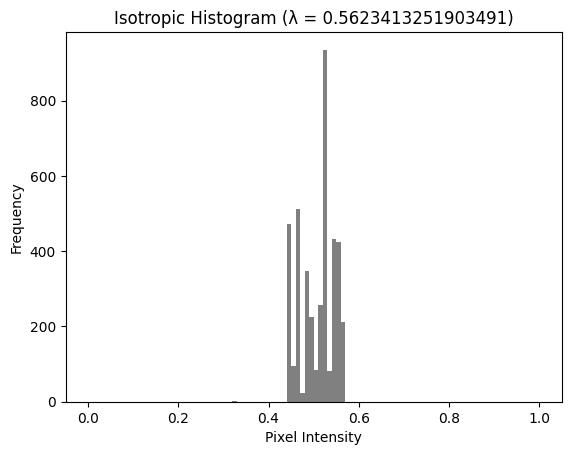

Anisotropic Objective Value: 34.65762964415162


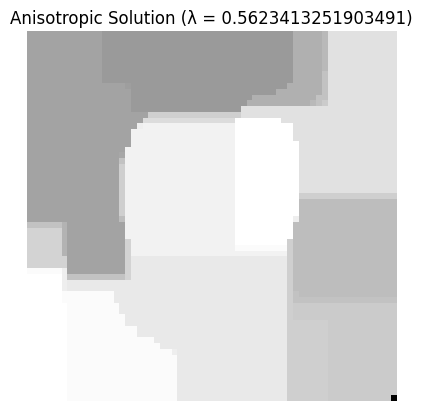

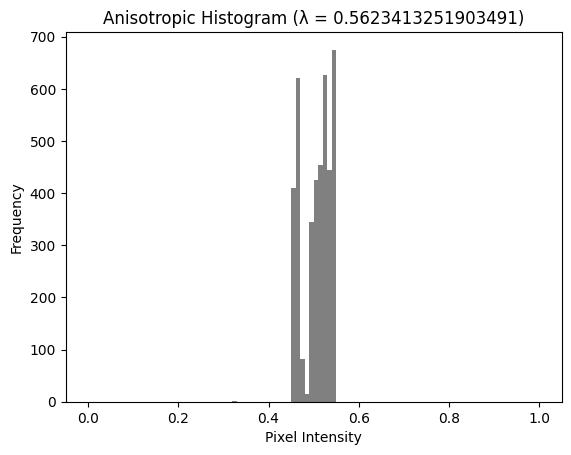

Lambda = 0.1778279410038923
Isotropic Objective Value: 20.96172838333828


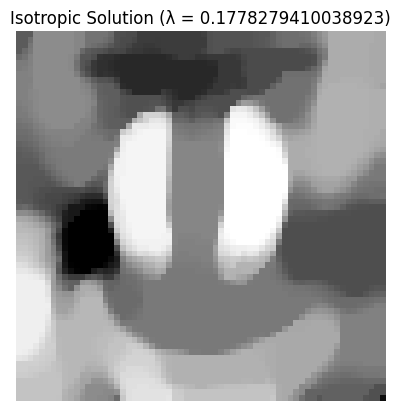

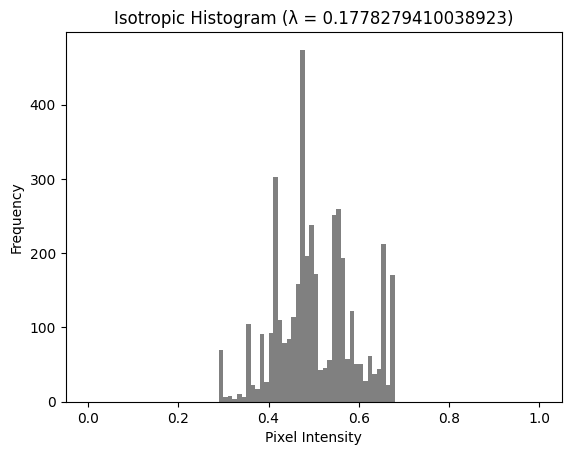

Anisotropic Objective Value: 22.49616861304279


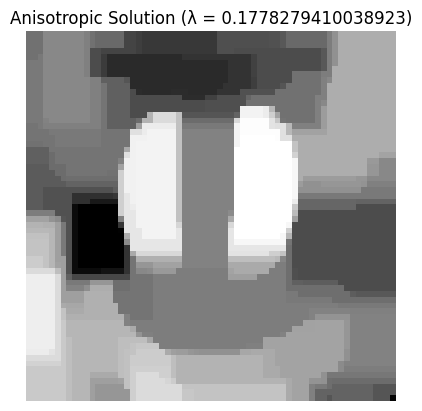

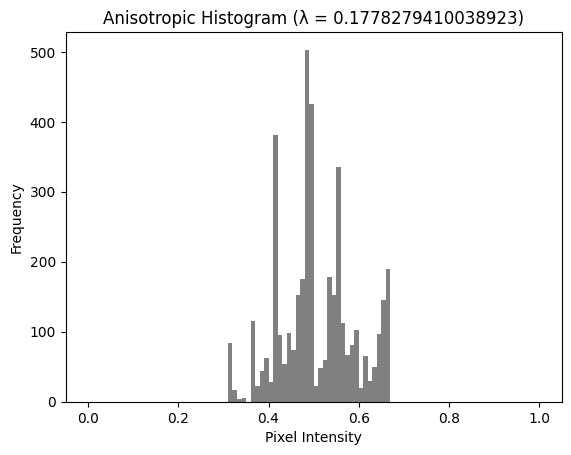

Lambda = 0.05623413251903491
Isotropic Objective Value: 10.700730684645634


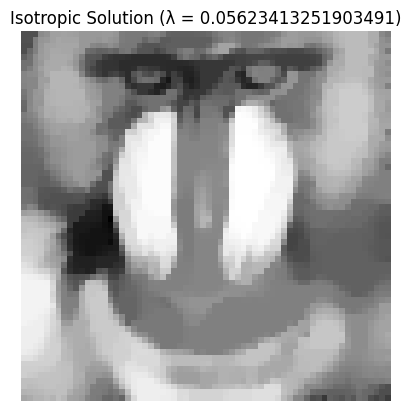

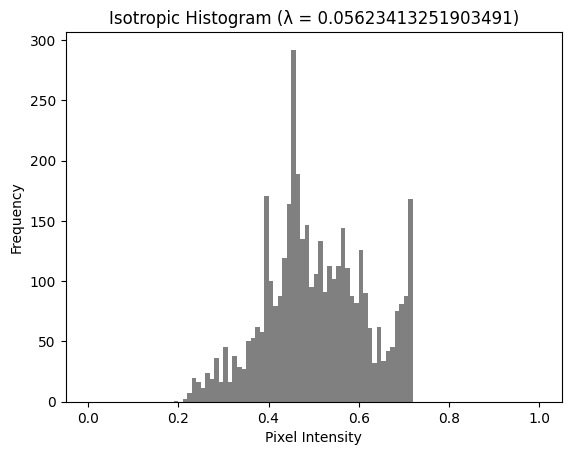

Anisotropic Objective Value: 11.832045684774801


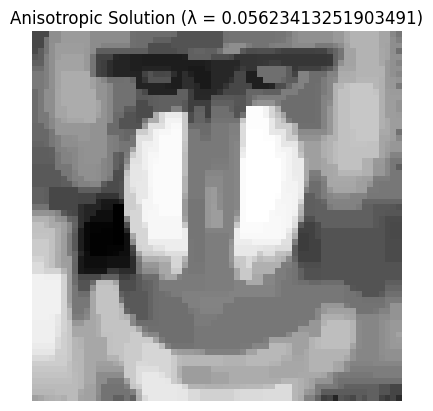

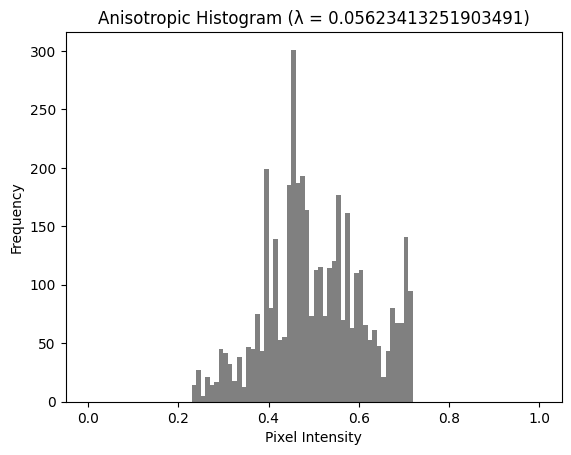

Lambda = 0.01778279410038923
Isotropic Objective Value: 4.648247832684902


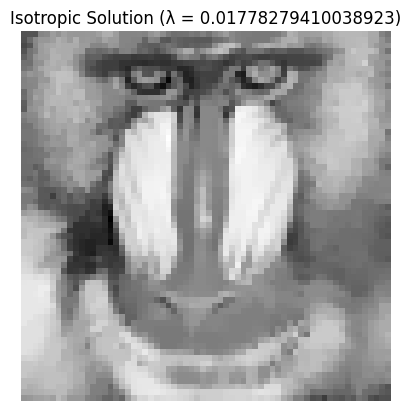

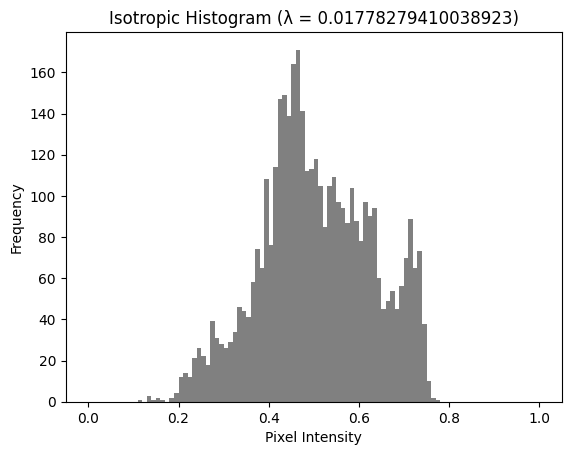

Anisotropic Objective Value: 5.379653799013052


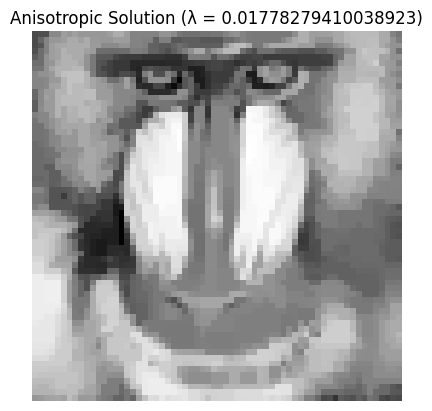

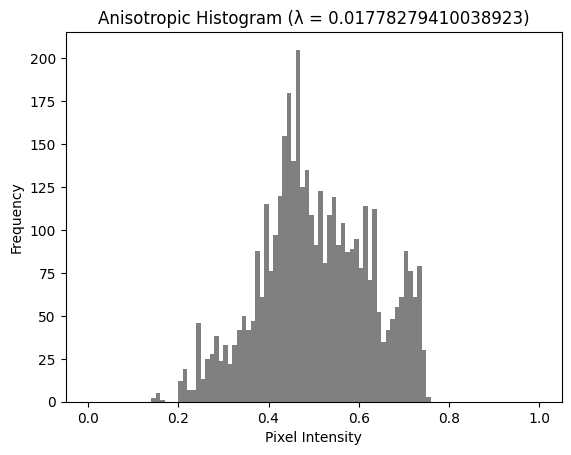

Lambda = 0.005623413251903491
Isotropic Objective Value: 1.7271478971926728


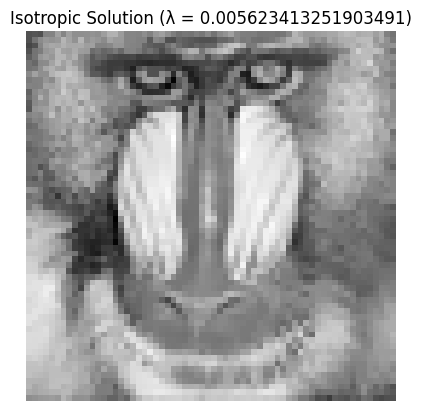

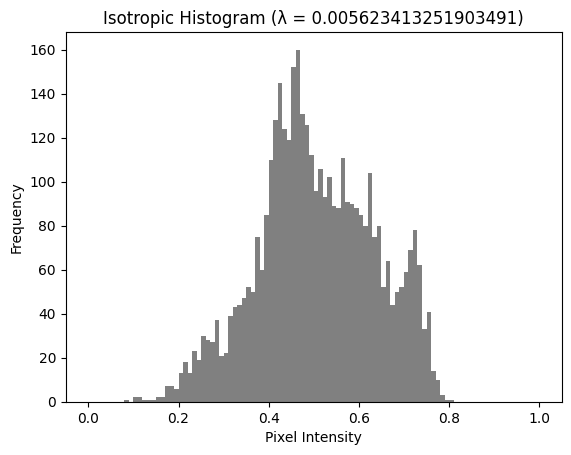

Anisotropic Objective Value: 2.0894569265425895


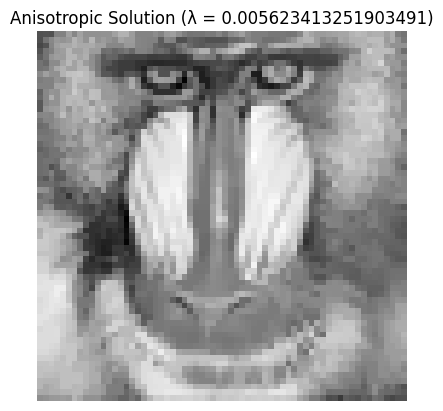

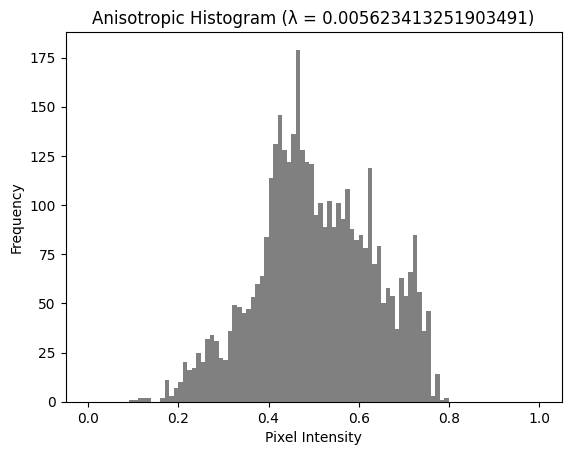

In [ ]:
import numpy as np
import cvxpy as cp
import csv
import matplotlib.pyplot as plt
from PIL import Image

def read_image(filename):
    with open(filename, newline='') as f:
        reader = csv.reader(f)
        image = np.array([[float(pixel) for pixel in row] for row in reader])
    return image

def isotropic_lasso(Y, lam=1.0):
    n, m = Y.shape
    Θ = cp.Variable((n, m))

    error_term = 0.5 * cp.sum_squares(Y - Θ)

    tv_penalty = 0
    for i in range(n - 1):
        for j in range(m - 1):
            diff_x = Θ[i, j] - Θ[i + 1, j]
            diff_y = Θ[i, j] - Θ[i, j + 1]
            tv_penalty += cp.norm(cp.hstack([diff_x, diff_y]), 2)

    objective = cp.Minimize(error_term + lam * tv_penalty)

    prob = cp.Problem(objective)
    prob.solve(solver=cp.SCS)

    return prob.value, Θ.value

def anisotropic_lasso(Y, lam=1.0):
    n, m = Y.shape
    Θ = cp.Variable((n, m))


    error_term = 0.5 * cp.sum_squares(Y - Θ)

    tv_penalty = 0
    for i in range(n - 1):
        for j in range(m - 1):
            diff_x = cp.abs(Θ[i, j] - Θ[i + 1, j])
            diff_y = cp.abs(Θ[i, j] - Θ[i, j + 1])
            tv_penalty += diff_x + diff_y

    objective = cp.Minimize(error_term + lam * tv_penalty)

    prob = cp.Problem(objective)
    prob.solve(solver=cp.SCS)

    return prob.value, Θ.value

def display_grayscale_image(img_array, title=""):
    img = Image.fromarray((img_array * 255).astype(np.uint8))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_histogram(img_array, title=""):
    plt.hist(img_array.ravel(), bins=100, range=(0, 1), color='gray')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

baboon = read_image("baboon.csv")
display_grayscale_image(baboon, "Original Image")

lambda_values = [10**(-(2*k + 1) / 4) for k in range(5)]

for lam in lambda_values:
    print(f"Lambda = {lam}")

    iso_opt_value, iso_img = isotropic_lasso(baboon, lam)
    print(f"Isotropic Objective Value: {iso_opt_value}")
    display_grayscale_image(iso_img, f"Isotropic Solution (λ = {lam})")
    plot_histogram(iso_img, f"Isotropic Histogram (λ = {lam})")

    aniso_opt_value, aniso_img = anisotropic_lasso(baboon, lam)
    print(f"Anisotropic Objective Value: {aniso_opt_value}")
    display_grayscale_image(aniso_img, f"Anisotropic Solution (λ = {lam})")
    plot_histogram(aniso_img, f"Anisotropic Histogram (λ = {lam})")


# Question 3

In [114]:
import numpy as np
import cvxpy as cp

N = 1000
S = 10
M = 100
K = 10

ind0 = np.random.choice(N, S, replace=False)
x0 = np.zeros(N)
x0[ind0] = np.random.rand(S)

A = np.zeros((M, N))
for i in np.arange(N):
    ind = np.random.choice(M, K, replace=False)
    A[ind, i] = 1

y = A @ x0

x = cp.Variable(N, nonneg=True)
objective = cp.Minimize(cp.norm1(x))
constraints = [A @ x == y]
problem = cp.Problem(objective, constraints)

problem.solve()

print("Optimization status:", problem.status)
print("Identified infected individuals:", np.where(x.value > 1e-4)[0])
print("True infected individuals:      ", np.where(x0 > 0)[0])
print("Does the algorithm identify all infected individuals correctly? ",
      np.allclose(np.where(x.value > 1e-4)[0], np.where(x0 > 0)[0]))

Optimization status: optimal
Identified infected individuals: [ 74 174 183 302 427 446 735 805 860 985]
True infected individuals:       [ 74 174 183 302 427 446 735 805 860 985]
Does the algorithm identify all infected individuals correctly?  True


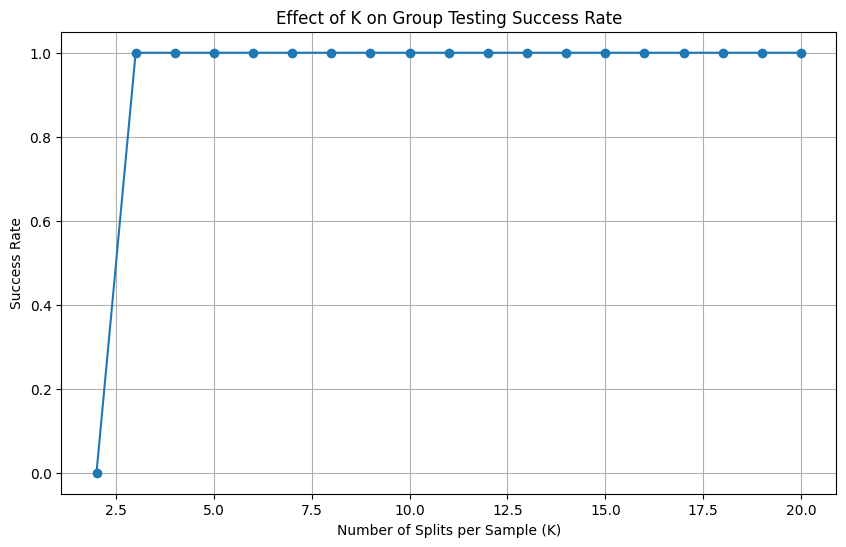

In [115]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

N = 1000
S = 10
M = 100

ind0 = np.random.choice(N, S, replace=False)
x0 = np.zeros(N)
x0[ind0] = np.random.rand(S)

success_rates = []
K_values = range(2, 21)

for K in K_values:

    A = np.zeros((M, N))
    for i in np.arange(N):
        ind = np.random.choice(M, K, replace=False)
        A[ind, i] = 1

    y = A @ x0

    x = cp.Variable(N, nonneg=True)
    objective = cp.Minimize(cp.norm1(x))
    constraints = [A @ x == y]
    problem = cp.Problem(objective, constraints)
    problem.solve()

    identified = np.where(x.value > 1e-4)[0]
    success = np.array_equal(np.sort(identified), np.sort(ind0))
    success_rates.append(success)

plt.figure(figsize=(10, 6))
plt.plot(K_values, success_rates, marker='o')
plt.xlabel('Number of Splits per Sample (K)')
plt.ylabel('Success Rate')
plt.title('Effect of K on Group Testing Success Rate')
plt.grid(True)
plt.show()

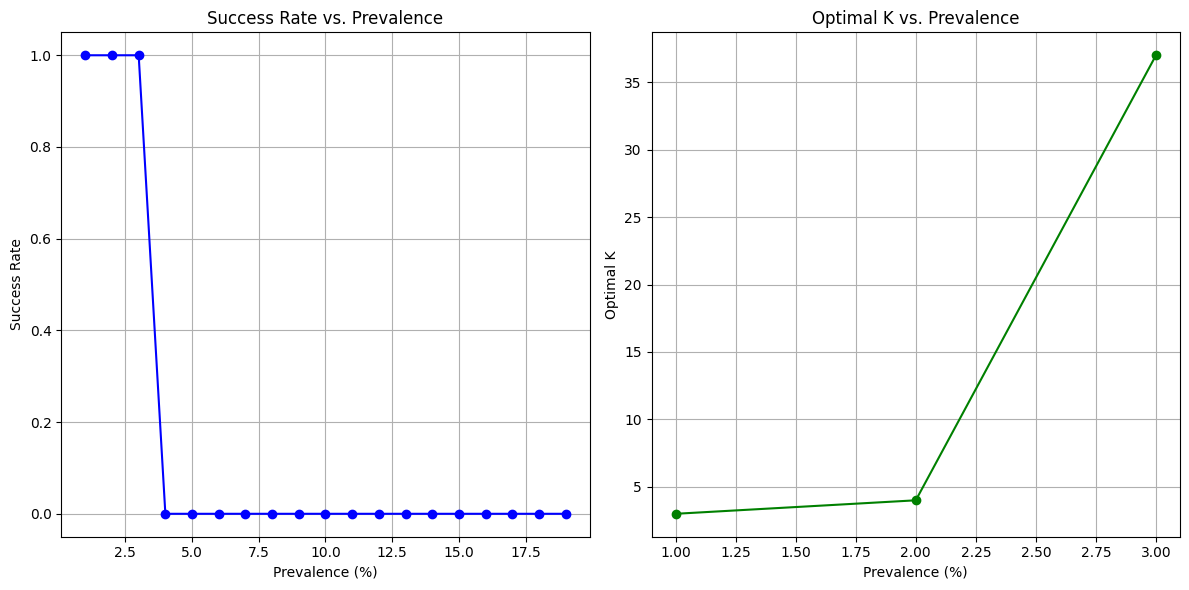

In [116]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

N = 1000
M = 100
tolerance = 1e-4

prevalence_levels = np.arange(0.01, 0.20, 0.01)

success_rates = []
optimal_K = []

for prevalence in prevalence_levels:
    S = int(N * prevalence)
    ind0 = np.random.choice(N, S, replace=False)
    x0 = np.zeros(N)
    x0[ind0] = np.random.rand(S)

    best_K = None
    success_for_prevalence = False

    for K in range(1, M + 1):
        A = np.zeros((M, N))
        for i in np.arange(N):
            ind = np.random.choice(M, K, replace=False)
            A[ind, i] = 1

        y = A @ x0

        x = cp.Variable(N, nonneg=True)
        objective = cp.Minimize(cp.norm1(x))
        constraints = [A @ x == y]
        problem = cp.Problem(objective, constraints)
        problem.solve()

        identified = np.where(x.value > tolerance)[0]
        success = np.array_equal(np.sort(identified), np.sort(ind0))

        if success:
            best_K = K
            success_for_prevalence = True
            break

    optimal_K.append(best_K if success_for_prevalence else None)
    success_rates.append(success_for_prevalence)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(prevalence_levels * 100, success_rates, marker='o', color='blue')
plt.xlabel('Prevalence (%)')
plt.ylabel('Success Rate')
plt.title('Success Rate vs. Prevalence')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(prevalence_levels * 100, optimal_K, marker='o', color='green')
plt.xlabel('Prevalence (%)')
plt.ylabel('Optimal K')
plt.title('Optimal K vs. Prevalence')
plt.grid(True)

plt.tight_layout()
plt.show()

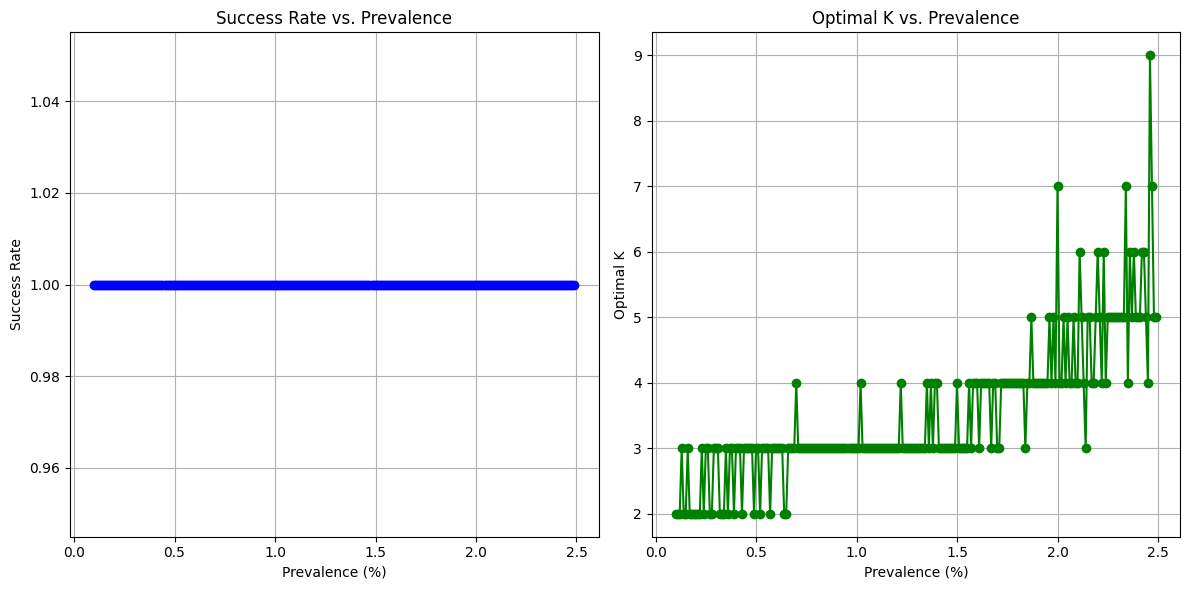

In [119]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

N = 1000
M = 100
tolerance = 1e-4

prevalence_levels = np.arange(0.001, 0.025, 0.0001)
success_rates = []
optimal_K = []

for prevalence in prevalence_levels:
    S = int(N * prevalence)
    ind0 = np.random.choice(N, S, replace=False)
    x0 = np.zeros(N)
    x0[ind0] = np.random.rand(S)

    best_K = None
    success_for_prevalence = False

    for K in range(1, M + 1):
        A = np.zeros((M, N))
        for i in np.arange(N):
            ind = np.random.choice(M, K, replace=False)
            A[ind, i] = 1

        y = A @ x0

        x = cp.Variable(N, nonneg=True)
        objective = cp.Minimize(cp.norm1(x))
        constraints = [A @ x == y]
        problem = cp.Problem(objective, constraints)
        problem.solve()

        identified = np.where(x.value > tolerance)[0]
        success = np.array_equal(np.sort(identified), np.sort(ind0))

        if success:
            best_K = K
            success_for_prevalence = True
            break

    optimal_K.append(best_K if success_for_prevalence else None)
    success_rates.append(success_for_prevalence)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(prevalence_levels * 100, success_rates, marker='o', color='blue')
plt.xlabel('Prevalence (%)')
plt.ylabel('Success Rate')
plt.title('Success Rate vs. Prevalence')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(prevalence_levels * 100, optimal_K, marker='o', color='green')
plt.xlabel('Prevalence (%)')
plt.ylabel('Optimal K')
plt.title('Optimal K vs. Prevalence')
plt.grid(True)

plt.tight_layout()
plt.show()

#Q4

In [145]:
data = np.load('LQM_data.npz')
X_train = data['X_train']
Y_train = data['Y_train']
d_train = data['d_train']


n = X_train.shape[0]
P = cp.Variable((n, n), symmetric=True)

objective_terms = []
objective_sum = 0
for i in range(len(d_train)):
    xi = X_train[:, i]
    yi = Y_train[:, i]
    di = d_train[i]

    objective_sum = objective_sum + cp.power(cp.quad_form(xi - yi, P)- cp.power(di, 2), 2)

objective = cp.Minimize(objective_sum)
constraints = [P >> 0]
problem = cp.Problem(objective, constraints)
problem.solve()

P_opt = P.value


X_test = data['X_test']
Y_test = data['Y_test']
d_test = data['d_test']

len(d_test)
MSE = 0
for i in range(len(d_test)):
    xi = X_test[:, i]
    yi = Y_test[:, i]
    di = d_test[i]
    diff = xi - yi
    predicted_distance = (diff.T @ P_opt @ diff)**(1/2)
    MSE += (predicted_distance - di)**2/len(d_test)

print("Optimal P: ",P_opt)
print(f"Mean Squared Error on Test Data: {MSE}")

Optimal P:  [[ 2.31282927 -2.46598658  0.85337846 -3.11888649  1.04298462]
 [-2.46598658  9.85373068 -3.2125139  -0.74806402  1.49776089]
 [ 0.85337846 -3.2125139   6.62854922  0.50677295 -1.69681132]
 [-3.11888649 -0.74806402  0.50677295  6.67217978 -2.44570102]
 [ 1.04298462  1.49776089 -1.69681132 -2.44570102  3.48950362]]
Mean Squared Error on Test Data: 0.7995137207130284


#Q5

X Coordinates: [-3.8355737 -3.2269177 -1.6572955 -2.8202585 -1.7831869 -2.1605783
 -2.0960803 -1.3866295 -3.2077849 -2.0095986 -2.0965432 -2.8128775
 -3.6501826 -2.1638414 -1.727471  -1.574323  -1.3761806 -1.3602495
 -1.5257654 -1.9231176 -2.9296195 -3.282827  -2.9078414 -3.5423007
 -3.1388035 -1.7957226 -2.6267585 -3.6652627 -3.7394118 -3.7898021
 -3.6200108 -3.0386294 -2.0320023 -2.9577808 -2.9146706 -3.2243786
 -2.1781976 -2.254515  -1.2559218 -1.8875105 -3.6122685 -2.6552417
 -1.412756  -3.7475311 -2.1367633 -3.9263527 -2.3118969 -1.4249518
 -2.0196394 -1.4021445]
Y Coordinates: [5.906125  7.5112709 7.470473  7.737812  5.4818448 7.723145  7.7072529
 6.1452654 7.6023307 7.6382459 5.242151  5.1622157 7.25855   7.6899057
 5.4564872 7.3510769 6.9730981 6.9056362 5.7518622 7.677503  7.7561481
 5.4188036 5.1741322 5.5660735 7.7008514 5.4273243 7.7336173 7.2686635
 6.0293335 5.9057623 5.7754097 5.3028798 5.2594588 5.3040353 7.7731243
 5.4402982 7.7681141 5.2233652 6.2741755 5.4133273 7.27

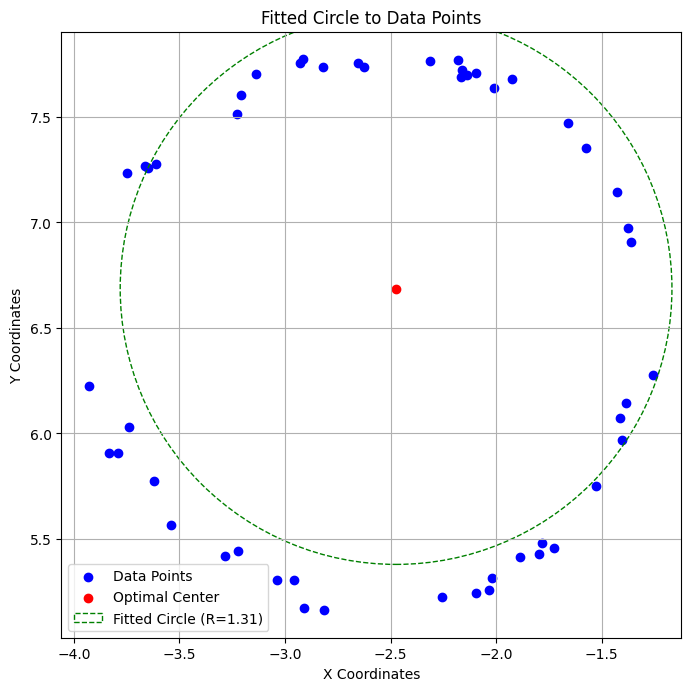

In [2]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

file_path = 'Q5.npz'
data = np.load(file_path)

x_coords, y_coords = data['U'][0], data['U'][1]

print("X Coordinates:", x_coords)
print("Y Coordinates:", y_coords)

cx = cvx.Variable()
cy = cvx.Variable()

obj = cvx.Minimize(cvx.sum(cvx.norm(cvx.vstack((x_coords - cx, y_coords - cy)), axis=0)))

prob = cvx.Problem(obj)
prob.solve()

xc = np.array([cx.value, cy.value])
print(f"Optimal center: {xc}")

distances = np.sqrt((x_coords - xc[0])**2 + (y_coords - xc[1])**2)
rms_distance = np.sqrt(np.mean(distances**2))
print(f"Root Mean Squared Distance (RMSD): {rms_distance}")

plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, color='blue', label='Data Points')
plt.scatter(xc[0], xc[1], color='red', label='Optimal Center')

circle = plt.Circle(xc, rms_distance, color='green', fill=False, linestyle='--', label=f'Fitted Circle (R={rms_distance:.2f})')
plt.gca().add_artist(circle)

plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Fitted Circle to Data Points')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.show()


#Q6

In [137]:
import numpy as np
import cvxpy as cvx

k = 201
t = np.linspace(-3, 3, k)
y = np.exp(t)
t_pow = np.vstack([np.ones_like(t), t, t**2])

upper_bound = np.exp(3)
lower_bound = 0
tolerance = 1e-3
max_iterations = 1000

a = cvx.Variable(3)
b = cvx.Variable(2)
gamma = cvx.Parameter()

def create_problem(gamma_value):
    gamma.value = gamma_value
    b_full = cvx.hstack([1, b])
    constraints = cvx.abs(a @ t_pow - cvx.multiply(y, b_full @ t_pow)) <= gamma * (b_full @ t_pow)
    objective = cvx.Minimize(gamma)
    return cvx.Problem(objective, [constraints])

def check_solution_bounds(upper_bound, lower_bound):
    create_problem(upper_bound).solve()
    if gamma.value is None or gamma.value <= 0:
        raise ValueError("Upper bound too small; no feasible solution.")

    create_problem(lower_bound).solve()
    if gamma.value is not None:
        raise ValueError("Lower bound too large; feasible solution exists.")

try:
    check_solution_bounds(upper_bound, lower_bound)
    u, l = upper_bound, lower_bound
    best_gamma, best_a, best_b = None, None, None

    for iteration in range(max_iterations):
        mid_gamma = (u + l) / 2
        prob = create_problem(mid_gamma)
        try:
            prob.solve()
        except cvx.SolverError:
            prob.solve(solver=cvx.SCS)

        print(f"Iteration: {iteration}, Status: {prob.status}, Upper: {u:.3f}, Lower: {l:.3f}, Gamma: {mid_gamma:.3f}")

        if prob.status == 'optimal':
            u = mid_gamma
            best_a = a.value
            best_b = np.hstack([1, b.value])
            best_gamma = gamma.value[0]
        else:
            l = mid_gamma

        if u - l <= tolerance:
            print("Tolerance met. Converged.")
            break
    else:
        print("Maximum iterations reached. Solution may not have converged.")

    if best_gamma is not None:
        print("\nOptimal Solution Found:")
        print(f"Optimal Gamma: {best_gamma:.6f}")
        print(f"Optimal a: {best_a}")
        print(f"Optimal b: {best_b}")
    else:
        print("\nNo feasible solution found.")

except ValueError as e:
    print(e)
print("\nOptimal Solution Found:")
print(f"Optimal Gamma: {best_gamma:.6f}")
print(f"Optimal a0 , a1 , a2: {best_a}")
print(f"Optimal b0 = 1 , b1 , b2: {best_b}")

Lower bound too large; feasible solution exists.

Optimal Solution Found:
Optimal Gamma: 0.023293
Optimal a0 , a1 , a2: [1.00976773 0.61190828 0.11350632]
Optimal b0 = 1 , b1 , b2: [ 1.         -0.41457934  0.04849808]
